In [2]:
## One Hot Encoding
from sklearn.preprocessing import LabelEncoder
## train test split
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/DSA4266_Tundra")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('merged_data.csv')

In [5]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [6]:
df['seq'] = df['sequence'].str[1:6]

In [7]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,AGACC
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,AGACC
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,AGACC
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,AGACC
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,AGACC


In [9]:
df_le = df.copy()
holder = df_le["seq"].values.reshape(-1, 1)

label_encoder = LabelEncoder()

temp = pd.DataFrame(label_encoder.fit_transform(holder))

temp.columns = ["seq_le"]

df_le = df_le.join(temp)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df_le = df_le.drop(["sequence", "seq"], axis=1)

In [11]:
df_le.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
0,ENST00000000233,244,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,4
1,ENST00000000233,244,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,4
2,ENST00000000233,244,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,4
3,ENST00000000233,244,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,4
4,ENST00000000233,244,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,4


In [12]:
train, test = train_test_split(df_le, test_size=0.2)

In [13]:
len(train)

8821684

In [14]:
len(test)

2205422

In [15]:
len(train[train['label'] == 0])

8422349

In [16]:
len(train[train['label'] == 1])

399335

In [17]:
399415/8422269

0.0474236811956493

       transcript_position  -1_flank_length   -1_flank_std  -1_flank_mean  \
count        798723.000000    798723.000000  798723.000000  798723.000000   
mean           1333.723073         0.008219       4.491821     113.493710   
std            1100.427354         0.005470       2.571430      10.854977   
min               3.000000         0.001660       0.195000      74.400000   
25%             612.000000         0.004330       2.590000     107.000000   
50%            1065.000000         0.006700       3.740000     116.000000   
75%            1779.000000         0.010300       5.850000     121.000000   
max           18730.000000         0.120000     185.000000     149.000000   

       central_length    central_std   central_mean  +1_flank_length  \
count   798723.000000  798723.000000  798723.000000    798723.000000   
mean         0.008228       5.179943     113.159413         0.007188   
std          0.005386       2.917374      12.329208         0.004463   
min          0.001

<Axes: >

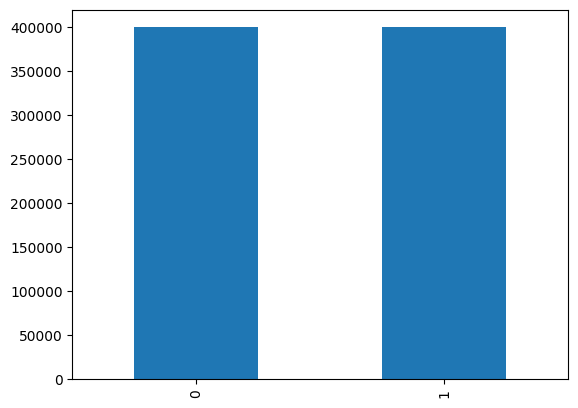

In [18]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(0.95258 * len(train[train['label'] == 0]))

# Get the indices of negative samples
negative_indices = train.index[train['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
train = train.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
train.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(train.describe())
train['label'].value_counts().plot(kind='bar')

In [19]:
train.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
0,ENST00000511348,1496,0.00332,4.34,115.0,0.00831,4.93,120.0,0.00564,2.34,87.0,ENSG00000164032,1,11
1,ENST00000264883,1070,0.00564,10.70,115.0,0.01160,2.75,87.5,0.00500,2.54,86.9,ENSG00000138750,0,6
2,ENST00000393820,1043,0.00518,3.68,112.0,0.00465,6.45,90.4,0.00332,2.00,84.7,ENSG00000181163,0,0
3,ENST00000400000,768,0.01790,5.68,109.0,0.00764,3.54,102.0,0.00432,2.14,90.5,ENSG00000101558,0,0
4,ENST00000301905,1556,0.00936,1.71,91.4,0.02600,2.70,98.2,0.00697,2.04,88.7,ENSG00000168078,0,12


In [20]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [22]:
# Columns to exclude from scaling
exclude_columns = ['transcript_id', 'gene_id',"label"]

# Columns to scale
columns_to_scale = [col for col in train.columns if col not in exclude_columns]

# Apply Min-Max scaling to the specified columns

train[columns_to_scale] = mm.fit_transform(train[columns_to_scale])
test[columns_to_scale] = mm.fit_transform(test[columns_to_scale])

In [23]:
train.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
0,ENST00000511348,0.079724,0.014027,0.022429,0.544236,0.055723,0.029448,0.585122,0.047358,0.023353,0.327217,ENSG00000164032,1,0.647059
1,ENST00000264883,0.056977,0.033632,0.056844,0.544236,0.083291,0.015803,0.120172,0.039743,0.025556,0.325688,ENSG00000138750,0,0.352941
2,ENST00000393820,0.055535,0.029745,0.018858,0.504021,0.025054,0.038961,0.161660,0.019752,0.019608,0.292049,ENSG00000181163,0,0.000000
3,ENST00000400000,0.040850,0.137232,0.029680,0.463807,0.050109,0.020748,0.327611,0.031652,0.021150,0.380734,ENSG00000101558,0,0.000000
4,ENST00000301905,0.082928,0.065067,0.008198,0.227882,0.203955,0.015491,0.273247,0.063184,0.020048,0.353211,ENSG00000168078,0,0.705882


In [24]:
test.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
4561100,ENST00000334701,0.151599,0.026616,0.019451,0.629156,0.090909,0.046833,0.665012,0.050859,0.018843,0.358904,ENSG00000080824,0,0.294118
2209192,ENST00000272542,0.094249,0.081360,0.018602,0.386189,0.042528,0.028232,0.295285,0.050859,0.020650,0.310959,ENSG00000144136,0,0.058824
5222309,ENST00000353411,0.030491,0.064981,0.014841,0.462916,0.036400,0.014807,0.379653,0.037674,0.008605,0.443836,ENSG00000113558,0,0.117647
10252590,ENST00000579248,0.029636,0.017981,0.052688,0.616368,0.161332,0.031645,0.240695,0.078173,0.019069,0.313699,ENSG00000265681,0,0.352941
2094544,ENST00000269187,0.125861,0.177497,0.026183,0.386189,0.066673,0.059690,0.553350,0.064752,0.021403,0.272603,ENSG00000141424,0,0.941176


In [25]:
train.to_csv('train_data_new.csv', index=False)
test.to_csv('test_data_new.csv', index=False)